In [41]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [42]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
Y = iris.target

In [43]:
#자동 dataset 분리 함수
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size=0.3, random_state = 0)

In [44]:
#데이터 표준화
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
#표준화된 dataset
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [46]:
#트리 학습
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.98


In [49]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

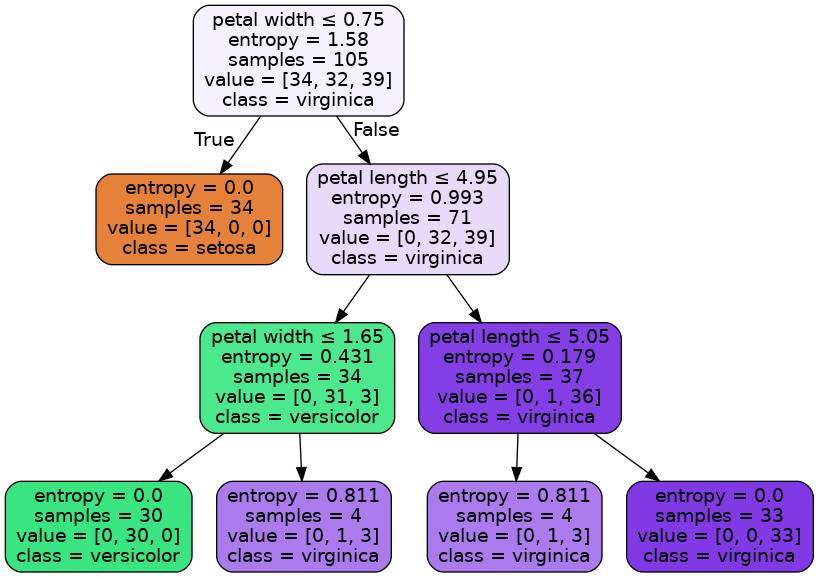

In [50]:
dot_data = export_graphviz(iris_tree, out_file = None, feature_names=['petal length', 'petal width'],
                          class_names = iris.target_names, filled= True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())